# K-pop Idols

* **Data:** `kpop_idols.csv`
* **Description:** K-pop is Korean pop music. It's popular the world over, especially when their fans take over Twitter hashtags. Idols are the individual musicians. Note that this dataset is not necessarily current k-pop idols, but includes people from the past, too (for example: group memberships might not be current).
* **Source:** https://www.kaggle.com/kimjihoo/kpopdb
* **Columns of interest:**
    * These are pretty self-explanatory. Just know "Birthplace" is the city they were born in, while "Country" is the country.

## Read in your data

In [1]:
import pandas as pd
pd.set_option('max_columns', None)

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('kpop_idols.csv')

In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Stage_Name', 'Full_Name', 'Korean_Name', 'K._Stage_Name',
       'Date_of_Birth', 'Group', 'Country', 'Birthplace', 'Other_Group',
       'Gender'],
      dtype='object')

## What is the percentage of male vs female kpop idols?

In [4]:
df.Gender.value_counts(normalize=True)

M    0.516031
F    0.483969
Name: Gender, dtype: float64

## Not all idols are born in South Korea: make a horizontal bar plot of the top five countries they're from, with the longest bar at the top.

<AxesSubplot:>

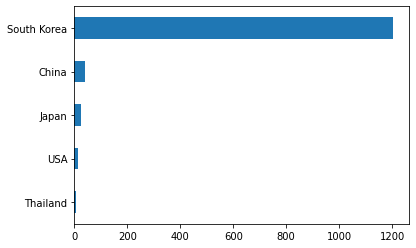

In [5]:
df.Country.value_counts().head(5).sort_values(ascending=True).plot(kind='barh')

## For **only** the idols born in China, what are the top 3 cities they were born in?

In [6]:
# ommitted the .head(3) here because a bunch of places are tied, all with one idol
df[df.Country == 'China'].Birthplace.value_counts()

Shanghai       3
Wuhan          2
Qingdao        2
Zhangjiajie    1
Haidian        1
Hainan         1
Zhejiang       1
Anshan         1
Guangdong      1
Jilin          1
Luoyang        1
Changsa        1
Heilong        1
Taizhou        1
Shenzen        1
Changja        1
Hunan          1
Mudanjiang     1
Haikou         1
Shenzhen       1
Beijing        1
Name: Birthplace, dtype: int64

## What group has the most members in our dataset?

In [7]:
df.Group.value_counts().head(1)

NCT    18
Name: Group, dtype: int64

## Save a CSV file of just the members of Cosmic Girls, calling it `cosmic-girls.csv`.

Count just the `Group` column.

In [8]:
cosmicgirls_df = df[df.Group == 'Cosmic Girls']
cosmicgirls_df

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender
65,Bona,Kim Jiyeon,김지연,보나,1995-08-19,Cosmic Girls,South Korea,Daegu,NaN,F
112,Cheng Xiao,Cheng Xiao,청샤오,성소,1998-07-15,Cosmic Girls,China,Shenzhen,NaN,F
157,Dawon,Nam Dawon,남다원,다원,1997-03-16,Cosmic Girls,South Korea,Seoul,NaN,F
163,Dayoung,Im Dayoung,임다영,다영,1999-05-14,Cosmic Girls,South Korea,Jeju,NaN,F
235,Eunseo,Son Juyeon,손주연,은서,1998-05-27,Cosmic Girls,South Korea,Incheon,NaN,F
240,Exy,Chu Sojung,추소정,엑시,1995-11-06,Cosmic Girls,South Korea,Busan,NaN,F
722,Luda,Lee Luda,이루다,루다,1997-03-06,Cosmic Girls,South Korea,Seoul,WJMK,F
735,Meiqi,Meng Meiqi,멍메이치,미기,1998-10-15,Cosmic Girls,China,Luoyang,NaN,F
918,Seola,Kim Hyunjung,김현정,설아,1994-12-24,Cosmic Girls,South Korea,Seoul,WJMK,F
1001,Soobin,Park Soobin,박수빈,수빈,1996-09-14,Cosmic Girls,South Korea,Seoul,NaN,F


In [9]:
cosmicgirls_df.to_csv('cosmic-girls.csv', index=False)

## How many idols are members of `Super Junior-M`?

Count both `Group` and `Other Group`.

In [10]:
len(df[(df.Group == 'Super Junior') | (df.Other_Group == 'Super Junior-M')])

10

## Create a new column called `age` that is the age of the idol.

There are a few ways you can do this, but when calculating the age **just use the year**, you don't need to worry if they've had a birthday or not in 2021. For example, A.M. was born in 1996, so we would say she is **2021 - 1996 = 25 years old**.

In [11]:
df.Date_of_Birth = pd.to_datetime(df.Date_of_Birth, format='%Y-%m-%d', errors='coerce')

In [12]:
df['age'] = 2021 - df.Date_of_Birth.dt.year

## Who are the four youngest idols in our dataset?

In [13]:
df.sort_values('age').head(4)

,Stage_Name,Full_Name,Korean_Name,K._Stage_Name,Date_of_Birth,Group,Country,Birthplace,Other_Group,Gender,age
142,Dahyun,Jeong Dahyun,정다현,다현,2005-04-29,Rocket Punch,South Korea,NaN,NaN,F,16
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F,16
1213,Yeseo,Kang Yeseo,강예서,예서,2005-08-22,Busters,South Korea,NaN,NaN,F,16
332,Heesun,Park Heesun,박희선,희선,2005-01-25,Pink Fantasy,South Korea,NaN,NaN,F,16


## What is the median age of male vs female idols?

In [14]:
df.groupby('Gender').age.median()

Gender
F    25.0
M    26.0
Name: age, dtype: float64